CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import model
import utils

CODE BLOCK: 2

In [2]:
# CUDA?
utils.isCudaAvailable()

CUDA Available? True


True

CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = utils.getTrainTransforms()

# Test data transformations
test_transforms = utils.getTestTransforms()

CODE BLOCK: 4

In [4]:
train_data = utils.getTrainDataset(train_transforms)

test_data = utils.getTestDataset(test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 138864358.63it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 36170705.83it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46356887.93it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 23289154.97it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [5]:
batch_size = 512

train_loader = utils.getTrainLoader(batch_size, train_data)

test_loader = utils.getTestLoader(batch_size, test_data)


CODE BLOCK: 6

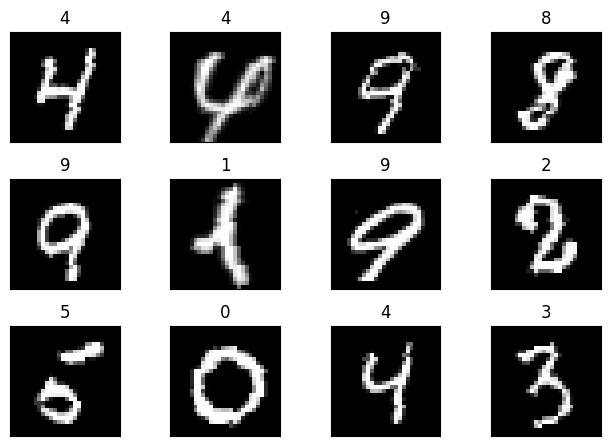

In [6]:
utils.plotImages(train_loader)

CODE BLOCK: 7

In [7]:

use_cuda = utils.isCudaAvailable()
device = utils.getDevice(use_cuda)
model = model.Net2().to(device)
utils.printSummary(model, (1, 28, 28))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [9]:
#model = Net().to(device)
optimizer = utils.getOptimizer(model, lr=0.01, momentum=0.9)
scheduler = utils.getScheduler(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = utils.train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test_acc, test_losses = utils.test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.1950 Batch_id=117 Accuracy=27.52: 100%|██████████| 118/118 [00:18<00:00,  6.23it/s]


Test set: Average loss: 2.1561, Accuracy: 3283/10000 (32.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3164 Batch_id=117 Accuracy=75.67: 100%|██████████| 118/118 [00:19<00:00,  5.98it/s]


Test set: Average loss: 0.2147, Accuracy: 9319/10000 (93.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1195 Batch_id=117 Accuracy=94.39: 100%|██████████| 118/118 [00:20<00:00,  5.82it/s]


Test set: Average loss: 0.0855, Accuracy: 9720/10000 (97.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0783 Batch_id=117 Accuracy=96.24: 100%|██████████| 118/118 [00:19<00:00,  6.14it/s]


Test set: Average loss: 0.0697, Accuracy: 9781/10000 (97.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0808 Batch_id=117 Accuracy=97.07: 100%|██████████| 118/118 [00:19<00:00,  6.17it/s]


Test set: Average loss: 0.0558, Accuracy: 9835/10000 (98.35%)

Adjusting learning rate of group 0 to 1.0000e-02.


CODE BLOCK: 11

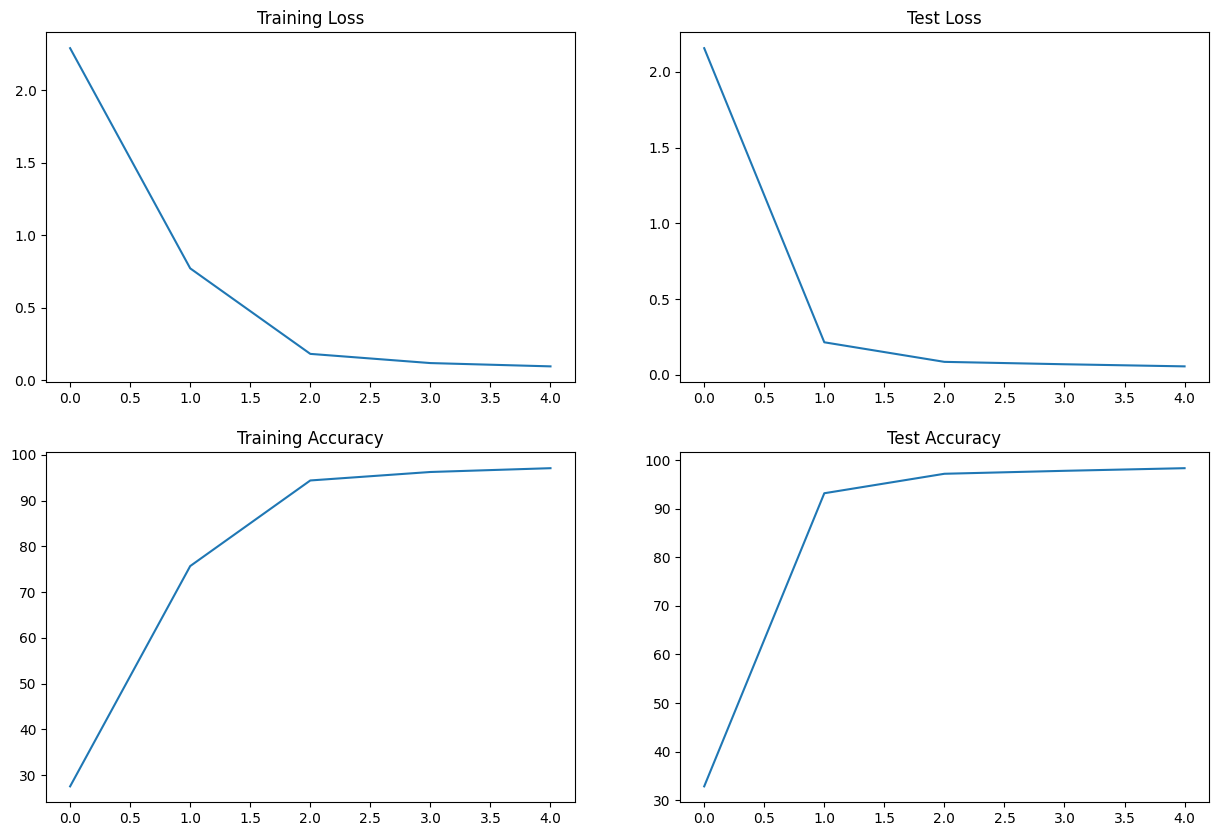

In [10]:
utils.plotResults(train_losses, train_acc, test_losses, test_acc)